In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
# # Import data
# df = pd.read_csv('training_project2.csv')

# # Drop date variable
# df = df.drop(columns=['open', 'high', 'low', 'close', 'volume', 'dividend', 'split'])

# # Checking dataset
# # print(df[df['id'] == 11477]['id'])

# # Split data by IDs and write to different files
# dfs = dict(tuple(df.groupby('id')))
# list_df = [dfs[x] for x in dfs]
# for index, df in enumerate(list_df):
#     df['moving_average'] = df['adjusted_close'].rolling(5).mean()
#     df.to_csv("data_by_id/" + str(index) + ".csv", index=False)

In [166]:
# import id 0, given data
dataset = pd.read_csv('data_by_id/0.csv',index_col="time",parse_dates=True)
# df = pd.read_csv('data_by_id/0.csv', index_col="time",parse_dates=True)
n = dataset['adjusted_close'].count()
dataset = dataset.iloc[:n-4,] # for some reason the last 4 are cut off of the factor, so subset by 4 here to match size

# import id 0, factor variable
# df = pd.read_csv('0.csv',index_col="time",parse_dates=True)
# df.tail(8)
time_index = dataset.index
time_index_predict = dataset.iloc[n-100-4:].index
dataset.tail(8)
# print(time_index_predict)

,adjusted_open,adjusted_high,adjusted_low,adjusted_close,adjusted_volume,id,moving_average
time,,,,,,,
2017-12-13,66.764149,67.191169,66.178237,66.217960,1684618.0,0,66.501978
2017-12-14,66.466227,66.625119,65.910108,66.049138,1774564.0,0,66.462255
2017-12-15,66.416574,67.389783,66.227890,67.141516,2871893.0,0,66.507936
2017-12-18,67.767150,68.035279,67.012416,67.191169,2306264.0,0,66.639022
2017-12-19,67.240823,67.578467,67.022347,67.280545,1448362.0,0,66.776066
2017-12-20,67.568536,67.667843,66.694634,66.932971,1363529.0,0,66.919068
2017-12-21,67.111723,67.399714,66.801786,67.052139,1502218.0,0,67.119668
2017-12-22,66.992555,67.071901,66.396712,66.883317,1221315.0,0,67.068028


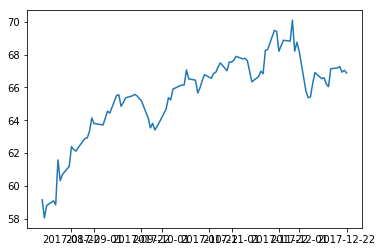

In [9]:
just_the_close = dataset['adjusted_close']
just_the_close = pd.DataFrame(just_the_close)
plt.plot(just_the_close[n-100:])
plt.show()

In [10]:
n = dataset['adjusted_close'].count()

print(n)

# n2 = df.count()
# print(n2)

4553


In [181]:
#training_set=dataset['factor_analyzed']
#training_set=pd.DataFrame(training_set)
#training=df['adjusted_open']
#training=pd.DataFrame(training)
# Feature Scaling
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)
#training_scaled=sc.fit_transform(training)

#training_set_scaled.plot(figsize=(16,6))
#training_scaled.plot(figsize=(16,6))

In [33]:
# training_set=dataset['adjusted_close'] # using just the adjusted close actually works best ...
# training_set = df['factor_analyzed'] # try with the factor
training_set = dataset['adjusted_close']
training_set=pd.DataFrame(training_set)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4553 entries, 1999-11-19 to 2017-12-22
Data columns (total 1 columns):
adjusted_close    4553 non-null float64
dtypes: float64(1)
memory usage: 71.1 KB


In [34]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
just_the_close_scaled = sc.fit_transform(just_the_close)

In [35]:
just_the_close.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4553 entries, 1999-11-19 to 2017-12-22
Data columns (total 1 columns):
adjusted_close    4553 non-null float64
dtypes: float64(1)
memory usage: 71.1 KB


In [96]:
# # Creating a data structure with 60 timesteps and 1 output
# X_train = []
# y_train = []
# for i in range(60, n-100):
#     X_train.append(training_set_scaled[i-60:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)

# # Reshaping
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# ===== use actual close for y, and factor variable for x
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
R = 60
for i in range(R, n-100):
    X_train.append(training_set_scaled[i-R:i, 0])
    y_train.append(just_the_close_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape
n2 = X_train.shape[0]

[[[0.19932501]
  [0.2237597 ]
  [0.19844752]
  ...
  [0.43557206]
  [0.44272697]
  [0.47944651]]

 [[0.2237597 ]
  [0.19844752]
  [0.20391495]
  ...
  [0.44272697]
  [0.47944651]
  [0.47350658]]

 [[0.19844752]
  [0.20391495]
  [0.20479244]
  ...
  [0.47944651]
  [0.47350658]
  [0.58150523]]

 ...

 [[0.48110948]
  [0.48071542]
  [0.48002581]
  ...
  [0.51859024]
  [0.52115739]
  [0.52283591]]

 [[0.48071542]
  [0.48002581]
  [0.48534564]
  ...
  [0.52115739]
  [0.52283591]
  [0.52046623]]

 [[0.48002581]
  [0.48534564]
  [0.48662634]
  ...
  [0.52283591]
  [0.52046623]
  [0.52777274]]]


In [37]:
# Initialising the RNN
regressor = Sequential()

In [38]:
# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [39]:
regressor.get_layer(index=0).get_config()

{'name': 'lstm_5',
 'trainable': True,
 'batch_input_shape': (None, 60, 1),
 'dtype': 'float32',
 'return_sequences': True,
 'return_state': False,
 'go_backwards': False,
 'stateful': False,
 'unroll': False,
 'units': 50,
 'activation': 'tanh',
 'recurrent_activation': 'hard_sigmoid',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'recurrent_initializer': {'class_name': 'Orthogonal',
  'config': {'gain': 1.0, 'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'unit_forget_bias': True,
 'kernel_regularizer': None,
 'recurrent_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'recurrent_constraint': None,
 'bias_constraint': None,
 'dropout': 0.0,
 'recurrent_dropout': 0.0,
 'implementation': 1}

In [40]:
regressor.get_layer(index=8).get_config()

{'name': 'dense_2',
 'trainable': True,
 'units': 1,
 'activation': 'linear',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [41]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
4393/4393 [==============================] - 31s 7ms/step - loss: 0.0031
Epoch 2/10
4393/4393 [==============================] - 28s 6ms/step - loss: 0.0012
Epoch 3/10
4393/4393 [==============================] - 26s 6ms/step - loss: 0.0011
Epoch 4/10
4393/4393 [==============================] - 25s 6ms/step - loss: 0.0010
Epoch 5/10
4393/4393 [==============================] - 25s 6ms/step - loss: 8.8707e-04
Epoch 6/10
4393/4393 [==============================] - 25s 6ms/step - loss: 8.6179e-04
Epoch 7/10
4393/4393 [==============================] - 25s 6ms/step - loss: 8.2461e-04
Epoch 8/10
4393/4393 [==============================] - 24s 5ms/step - loss: 7.4837e-04
Epoch 9/10
4393/4393 [==============================] - 24s 6ms/step - loss: 6.8788e-04
Epoch 10/10
4393/4393 [==============================] - 25s 6ms/step - loss: 7.0225e-04


In [44]:
X_test = []
X_test_forcasted = []
y_test = []
for i in range(n2-100, n2):
    X_test.append(training_set_scaled[i-60:i, :])
    y_test.append(training_set_scaled[i, :])
    for j in range(5):
        X_test_forcasted = np.array(X_test)
        X_test_forcasted = np.reshape(X_test_forcasted, (X_test_forcasted.shape[0], X_test_forcasted.shape[1], 1))
        y_predicted = regressor.predict(X_test_forcasted)
#         print("X_test shape:", X_test_forcasted.shape)
#         print("Y_predicted shape:", y_predicted.shape)
        y_predicted = np.reshape(y_predicted, (y_predicted.shape[0],1,1))
        X_test_forcasted = np.concatenate((X_test_forcasted[:,1:,:], y_predicted),axis = 1)


In [45]:
y_predicted = np.reshape(y_predicted, (y_predicted.shape[0], y_predicted.shape[1]))
predicted_stock_price=pd.DataFrame(y_predicted)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
0    100 non-null float32
dtypes: float32(1)
memory usage: 480.0 bytes


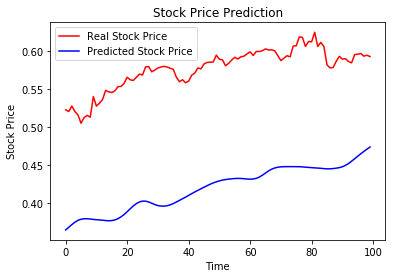

In [46]:
# Visualising the results
plt.plot(training_set_scaled[n-100:], color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [54]:
#### put predicted price and actual price in same df
# time_index = just_the_close.index
time_index = just_the_close.index
predicted_stock_price.index = time_index[n-100:]
just_the_close = pd.DataFrame(training_set_scaled).rename(index=str, columns={0: "a"})
just_the_close[n-100-4:].index = time_index[n-100-4:]
together_df = pd.concat((just_the_close[n-100-4:], predicted_stock_price), axis = 1)

# Index([u'adjusted_close', u'factor'],dtype='object')

together_df.rename(index=str, columns={"a": "actual_price", 0: "predicted_price"}, inplace = True)
together_df

# # ERROR
# ### having trouble with the scaling, putting predicted price (using factor) to close-prices
# close_unscaled = sc.inverse_transform(training_set)
# close_unscaled = pd.DataFrame(close_unscaled)
# close_unscaled.rename(index=str, columns={0: "predicted_price"}, inplace = True)
# close_unscaled = close_unscaled[n-100:]
# plt.plot(together_df['adjusted_close'])
# plt.plot(close_unscaled['predicted_price'])
# plt.show()
# close_unscaled.info()
# close_unscaled.tail()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,actual_price,predicted_price
4449,0.519973,NaN
4450,0.517109,NaN
4451,0.518590,NaN
4452,0.521157,NaN
4453,0.522836,0.364302
4454,0.520466,0.367829
4455,0.527773,0.371293
4456,0.520565,0.374442
4457,0.516023,0.376926
4458,0.505063,0.378410


In [55]:
# make new column with 2% price predictions 5 days in future from time t

together_df.head()
together_df = together_df.assign(actual_lag_5 = lambda x: x.actual_price.shift(-5))
together_df = together_df.assign(predict_lag_5 = lambda x: x.predicted_price.shift(-5))
together_df = together_df.assign(actual_percent = lambda x: (x.actual_lag_5 - x.actual_price)/x.actual_price)
together_df = together_df.assign(predict_percent = lambda x: (x.predict_lag_5 - x.predicted_price)/x.predicted_price)
together_df = together_df.assign(up_two = lambda x: (x.actual_percent > 0.02).astype(int))
together_df = together_df.assign(up_three = lambda x: (x.actual_percent > 0.03).astype(int))
together_df = together_df.assign(up_five = lambda x: (x.actual_percent > 0.05).astype(int))
together_df = together_df.assign(predict_up_two = lambda x: (x.predict_percent > 0.02).astype(int))
together_df = together_df.assign(predict_up_three = lambda x: (x.predict_percent > 0.03).astype(int))
together_df = together_df.assign(predict_up_five = lambda x: (x.predict_percent > 0.05).astype(int))

# print(together_df.iloc[2,'up_two'])

# for t in range(0,n-4):
#     together_df.iloc[t,'up_two'] = t
    
together_df.head(15)

,actual_price,predicted_price,actual_lag_5,predict_lag_5,actual_percent,predict_percent,up_two,up_three,up_five,predict_up_two,predict_up_three,predict_up_five
4449,0.519973,NaN,0.520466,0.367829,0.000949,NaN,0,0,0,0,0,0
4450,0.517109,NaN,0.527773,0.371293,0.020621,NaN,1,0,0,0,0,0
4451,0.518590,NaN,0.520565,0.374442,0.003808,NaN,0,0,0,0,0,0
4452,0.521157,NaN,0.516023,0.376926,-0.009852,NaN,0,0,0,0,0,0
4453,0.522836,0.364302,0.505063,0.378410,-0.033993,0.038728,0,0,0,1,1,0
4454,0.520466,0.367829,0.512567,0.379047,-0.015177,0.030499,0,0,0,1,1,0
4455,0.527773,0.371293,0.515431,0.379066,-0.023385,0.020937,0,0,0,1,0,0
4456,0.520565,0.374442,0.513061,0.378685,-0.014415,0.011330,0,0,0,0,0,0
4457,0.516023,0.376926,0.540312,0.378162,0.047070,0.003280,1,1,0,0,0,0
4458,0.505063,0.378410,0.527674,0.377781,0.044768,-0.001662,1,1,0,0,0,0


In [66]:
from keras.models import load_model

In [57]:
def LSTM_predict(filename):
    filename = 'data_by_id/'+filename
    print(filename)
    df = pd.read_csv(filename, index_col="time",parse_dates=True)
    df = df[4:]
    column = df['adjusted_open'].count()
    if (column > 60):
        return actual_predict(df, column)
    return None, None

In [64]:
def actual_predict(df, column):
        temp = df.copy()
        training_set = df.drop(['id', 'adjusted_volume'], axis=1)
        # Feature Scaling
        sc = MinMaxScaler(feature_range = (0, 1))
        training_set_scaled = sc.fit_transform(training_set)
        training_set_scaled.shape
        # Creating a data structure with 60 timesteps and 1 output
        X_test = []
        for i in range(60, column):
            X_test.append(training_set_scaled[i-60:i, :])
        X_test = np.array(X_test)
        # Reshaping
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
        regressor = load_model('project2_eureymarkmj/model.h5')
        y = regressor.predict(X_test)
        return temp, y

In [73]:
 def change_percent(together_df):
    together_df.rename(index=str, columns={0: "price"}, inplace = True)
    together_df = together_df.assign(actual_lag_5 = lambda x: x.price.shift(-5))
    together_df = together_df.assign(actual_percent = lambda x: (x.actual_lag_5 - x.price)/x.price)
    together_df = together_df.assign(up_two = lambda x: (x.actual_percent > 0.02).astype(int))
    together_df = together_df.assign(up_three = lambda x: (x.actual_percent > 0.03).astype(int))
    together_df = together_df.assign(up_five = lambda x: (x.actual_percent > 0.05).astype(int))
    
    together_df = together_df.assign(down_two = lambda x: (x.actual_percent < 0.02).astype(int))
    together_df = together_df.assign(down_three = lambda x: (x.actual_percent < 0.03).astype(int))
    together_df = together_df.assign(down_five = lambda x: (x.actual_percent < 0.05).astype(int))
#     together_df = together_df.drop([0, 1, 2, 'price', 4, 'actual_lag_5', 'actual_percent'], axis=1)
# together_df = together_df.drop([0, 1, 2, 'price', 4, 'actual_lag_5', 'actual_percent'], axis=1)
    return together_df

In [74]:
temp, y = LSTM_predict('0.csv')
dfnew = pd.DataFrame(predicted_stock_price)
new = change_percent(dfnew)

data_by_id/0.csv


In [165]:
new.index = time_index_predict
new.index = new.index.floor('D') # subsets to only year-month-day
print(new.index)
stock_id = '0'

DatetimeIndex(['2017-08-03', '2017-08-04', '2017-08-07', '2017-08-08',
               '2017-08-09', '2017-08-10', '2017-08-11', '2017-08-14',
               '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28', '2017-08-29', '2017-08-30',
               '2017-08-31', '2017-09-01', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-18',
               '2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22',
               '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
               '2017-09-29', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12', '2017-10-13', '2017-10-16',
               '2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20',
      

In [163]:
for i in new.index:
    if new.loc[i,'up_two'] > 0 and new.loc[i,'up_three'] > 0 and new.loc[i,'up_five'] > 0:
        print(stock_id, i, '+5')
    elif new.loc[i,'up_two'] > 0 and new.loc[i,'up_three'] > 0:
        print(stock_id, i, '+3')
    elif new.loc[i,'up_two'] > 0:
        print(stock_id, i, '+2')
    elif new.loc[i,'down_two'] > 0 and new.loc[i,'down_three'] > 0 and new.loc[i,'down_five'] > 0:
        print(stock_id, i, '-5')
    elif new.loc[i,'down_two'] > 0 and new.loc[i,'down_three'] > 0:
        print(stock_id, i, '-3')
    elif new.loc[i,'down_two'] > 0:
        print(stock_id, i, '-2')
    else:
        print(stock_id, i, '+0')


0 2017-08-03 00:00:00 +3
0 2017-08-04 00:00:00 +3
0 2017-08-07 00:00:00 +2
0 2017-08-08 00:00:00 -5
0 2017-08-09 00:00:00 -5
0 2017-08-10 00:00:00 -5
0 2017-08-11 00:00:00 -5
0 2017-08-14 00:00:00 -5
0 2017-08-15 00:00:00 -5
0 2017-08-16 00:00:00 -5
0 2017-08-17 00:00:00 -5
0 2017-08-18 00:00:00 -5
0 2017-08-21 00:00:00 -5
0 2017-08-22 00:00:00 -5
0 2017-08-23 00:00:00 +2
0 2017-08-24 00:00:00 +3
0 2017-08-25 00:00:00 +3
0 2017-08-28 00:00:00 +3
0 2017-08-29 00:00:00 +3
0 2017-08-30 00:00:00 +3
0 2017-08-31 00:00:00 +3
0 2017-09-01 00:00:00 +2
0 2017-09-05 00:00:00 -5
0 2017-09-06 00:00:00 -5
0 2017-09-07 00:00:00 -5
0 2017-09-08 00:00:00 -5
0 2017-09-11 00:00:00 -5
0 2017-09-12 00:00:00 -5
0 2017-09-13 00:00:00 -5
0 2017-09-14 00:00:00 -5
0 2017-09-15 00:00:00 -5
0 2017-09-18 00:00:00 -5
0 2017-09-19 00:00:00 -5
0 2017-09-20 00:00:00 +2
0 2017-09-21 00:00:00 +2
0 2017-09-22 00:00:00 +2
0 2017-09-25 00:00:00 +2
0 2017-09-26 00:00:00 +2
0 2017-09-27 00:00:00 +2
0 2017-09-28 00:00:00 +2


## new material to include:

In [180]:
time_index_predict = dataset.iloc[n-100-4:].index
new.index = time_index_predict
stock_id = dataset.loc[dataset.index[1],'id']

with open("test.txt", "a") as myfile:
    for i in new.index:
        if new.loc[i,'up_two'] > 0 and new.loc[i,'up_three'] > 0 and new.loc[i,'up_five'] > 0:
            new_line = str(str(stock_id) + ' ' + str(i) + ' +5 \n' )
            myfile.write(new_line)
        elif new.loc[i,'up_two'] > 0 and new.loc[i,'up_three'] > 0:
            new_line = str(str(stock_id) + ' ' + str(i) + ' +3 \n' )
            myfile.write(new_line)
        elif new.loc[i,'up_two'] > 0:
            new_line = str(str(stock_id) + ' ' + str(i) + ' +2 \n' )
            myfile.write(new_line)
        elif new.loc[i,'down_two'] > 0 and new.loc[i,'down_three'] > 0 and new.loc[i,'down_five'] > 0:
            new_line = str(str(stock_id) + ' ' + str(i) + ' -5 \n' )
            myfile.write(new_line)
        elif new.loc[i,'down_two'] > 0 and new.loc[i,'down_three'] > 0:
            new_line = str(str(stock_id) + ' ' + str(i) + ' -3 \n' )
            myfile.write(new_line)
        elif new.loc[i,'down_two'] > 0:
            new_line = str(str(stock_id) + ' ' + str(i) + ' -2 \n' )
            myfile.write(new_line)
        else:
            new_line = str(str(stock_id) + ' ' + str(i) + ' +0 \n' )
            myfile.write(new_line)

